In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
data = pd.read_csv("biomechanics_dataset_v1.csv") 
np.random.seed(12345)

In [2]:
X = data.iloc[:,1:60]
y = data.iloc[:, 60]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .2)
#Set up

In [3]:
model = LinearRegression()
feat_select = RFE(model, n_features_to_select = 10, step = 1)

When using Recursive Feature Elimination, we need to select a few variables. First, we need to select what model we want to use. Since we are using multiple linear regression, we select linear regression. We also need to select how many features we want to use, and how many we want to remove during each recursion. These we chose arbitrarily for this example to be 10 and 1 respectively.

If we then run our RFE, we find that it classified our features as True or False, where True refers to features it selected and False ones it did not.

In [4]:
feat_select.fit(X,y)
feat_select.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True,  True, False, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True])

From this we can see that it selected features :42, 43, 46, 47, 52, 53, 54, 56, 57 and 59. This means that the data set we would train our model on is the following

In [10]:
data.iloc[:,[42,43,46,47,52,53,54,56,57,59]]

,max_rfx,min_rfx,max_rfz,min_rfz,max_lfz,min_lfz,range_rfx,range_rfz,range_lfx,range_lfz
0,179.4015,-232.2776,1101.3711,48.8063,2322.2798,-13.4557,411.6791,1052.5648,1006.4781,2335.7355
1,140.1327,-189.7241,1092.3006,51.3111,2270.0012,-13.8138,329.8568,1040.9895,878.2801,2283.8150
2,106.3177,-124.4299,1117.9434,115.4112,1942.1915,-9.8942,230.7476,1002.5322,1006.2067,1952.0857
3,138.6102,-175.8547,1102.4140,7.9649,2509.2788,-9.1957,314.4649,1094.4491,1074.0880,2518.4745
4,175.0215,-219.5387,1119.0327,18.2982,2492.2496,-9.9647,394.5602,1100.7345,1116.0206,2502.2143
...,...,...,...,...,...,...,...,...,...,...
632,221.6785,-114.1301,947.5325,31.1219,1841.7965,-7.0486,335.8086,916.4106,762.2835,1848.8451
633,199.9496,-113.4915,958.0700,26.1562,1692.9015,-8.2001,313.4411,931.9138,730.4450,1701.1016
634,213.2872,-112.7565,998.6667,44.3632,1602.5900,-5.3440,326.0437,954.3035,726.2761,1607.9340
635,209.7961,-122.3425,939.1254,29.1908,1823.2046,-6.8408,332.1386,909.9346,801.7169,1830.0454


However, 10 was arbitrarily chosen, and may not be the best choice. If we run a series of RFE's which select for 1 more feature than the last we can then plot these values to find our optimal choice for the number of features.

In [6]:
  
scores = []

for x in range(60):
    estm = RFE(model, n_features_to_select = x+1, step = 1)
    estm.fit(x_train,y_train)
    scores.append(estm.score(x_test,y_test))


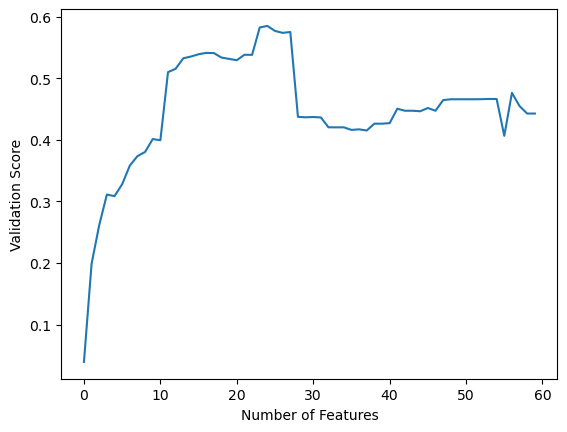

In [7]:
import matplotlib.pyplot as plt

# define data values
x_val= [] 

for j in range (60):
    x_val.append(j)

  
plt.plot(x_val, scores)  # Plot the chart
plt.xlabel("Number of Features")
plt.ylabel("Validation Score")
plt.show() 


From this chart we can see that we will be able to use a model with 15 features without losing too much accuracy, so we will next use RFE to find out the variables we want to use.

In [8]:
feat_select = RFE(model, n_features_to_select = 15, step = 1)
feat_select.fit(X,y)
feat_select.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True])

These refer to the following data set:

In [9]:
data.iloc[:,[42,43,46,47,48,49,50,51,52,53,54,56,57,58,59]]

,max_rfx,min_rfx,max_rfz,min_rfz,max_lfx,min_lfx,max_lfy,min_lfy,max_lfz,min_lfz,range_rfx,range_rfz,range_lfx,range_lfy,range_lfz
0,179.4015,-232.2776,1101.3711,48.8063,121.2052,-885.2729,130.9304,-414.4391,2322.2798,-13.4557,411.6791,1052.5648,1006.4781,545.3695,2335.7355
1,140.1327,-189.7241,1092.3006,51.3111,111.2187,-767.0614,128.0167,-475.8343,2270.0012,-13.8138,329.8568,1040.9895,878.2801,603.8510,2283.8150
2,106.3177,-124.4299,1117.9434,115.4112,178.4852,-827.7215,161.8112,-437.5895,1942.1915,-9.8942,230.7476,1002.5322,1006.2067,599.4007,1952.0857
3,138.6102,-175.8547,1102.4140,7.9649,170.5486,-903.5394,187.1682,-430.2591,2509.2788,-9.1957,314.4649,1094.4491,1074.0880,617.4273,2518.4745
4,175.0215,-219.5387,1119.0327,18.2982,176.3782,-939.6424,177.3536,-420.4205,2492.2496,-9.9647,394.5602,1100.7345,1116.0206,597.7741,2502.2143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,221.6785,-114.1301,947.5325,31.1219,69.2794,-693.0041,121.9773,-342.0296,1841.7965,-7.0486,335.8086,916.4106,762.2835,464.0069,1848.8451
633,199.9496,-113.4915,958.0700,26.1562,60.6210,-669.8240,129.1773,-342.2472,1692.9015,-8.2001,313.4411,931.9138,730.4450,471.4245,1701.1016
634,213.2872,-112.7565,998.6667,44.3632,56.2369,-670.0392,111.4454,-329.7390,1602.5900,-5.3440,326.0437,954.3035,726.2761,441.1844,1607.9340
635,209.7961,-122.3425,939.1254,29.1908,67.6610,-734.0559,149.3230,-383.7818,1823.2046,-6.8408,332.1386,909.9346,801.7169,533.1048,1830.0454
